## Two bars in contact: 
Two identical bars, 25cm long each, are in contact. One bar is initially at $50^{\circ}C$, and the other at $100^{\circ}C$. The free ends are kept at $0^{\circ}C$. Calculate and plot the temperature distribution as a function of time.

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

In [27]:
## Let's choose Al bar to study.

K = 0.49
c = 0.217
rho = 2.7
alpha = K/c/rho

l = 50    #length of the bar
dx = 0.5  # space step
nx = int(l/dx)  # number of points in space
mx = int(nx/2)  # number of points in single bar
x = np.arange(0,l+dx,dx) # the +1 is necessary to store the value at l
dt = 0.1
C = dx**2/dt
r = alpha/C

print(r)

0.33452807646356025


Time starts at t=0s and ends at t=200.0s


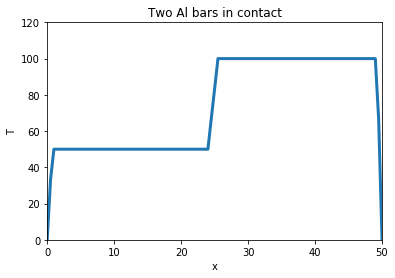

In [28]:
t0 = np.zeros(nx+1)
t1 = np.zeros(nx+1)

t0[:mx] = 50.
t0[mx:] = 100. # Middle point is at 100
t0[0] = 0.
t0[nx] = 0.


fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(0, 120), xlabel='x', ylabel='T')
points, = ax.plot([], [], marker='', linestyle='-', lw=3)
plt.title('Two Al bars in contact')

def evolve(i):
    
    global t0, t1

    for ix in range(1,nx):
        t1[ix] = t0[ix] + r*(t0[ix+1]+t0[ix-1]-2*t0[ix])  

    points.set_data(x, t0)

    for ix in range(nx):
        t0[ix] = t1[ix]       

    return points

N = 2000
anim = animation.FuncAnimation(fig, evolve, frames = N, interval=10)
print('Time starts at t=0s and ends at t={}s'.format(dt*N))



In [29]:
#display_animation(anim, default_mode='once')